In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree


import pickle

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"edgardogomez","key":"1a9e6201e95c6ca442440b84c1d3be5d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download itshappy/ps4e9-original-data-loan-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction
License(s): apache-2.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 89.0MB/s]


In [11]:
!unzip ps4e9-original-data-loan-approval-prediction.zip

Archive:  ps4e9-original-data-loan-approval-prediction.zip
  inflating: credit_risk_dataset.csv  


In [85]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [86]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [89]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [90]:
df.duplicated().sum()

165

In [91]:
df.dropna(inplace=True)

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [94]:
df.duplicated().sum()

0

In [95]:
df.reset_index(drop=True, inplace=True)

In [96]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28496,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28497,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28498,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28499,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
28500,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [97]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include='object')

<Axes: >

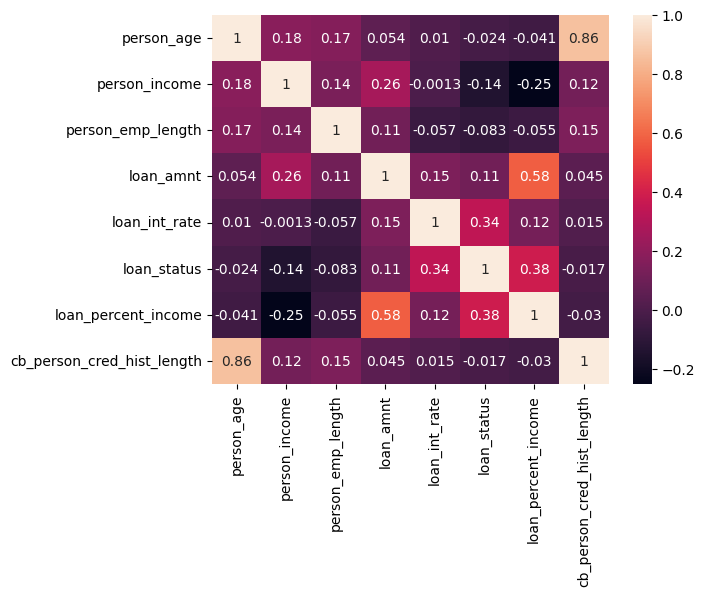

In [98]:
sns.heatmap(df_num.corr(), annot=True)

In [99]:
df_num.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

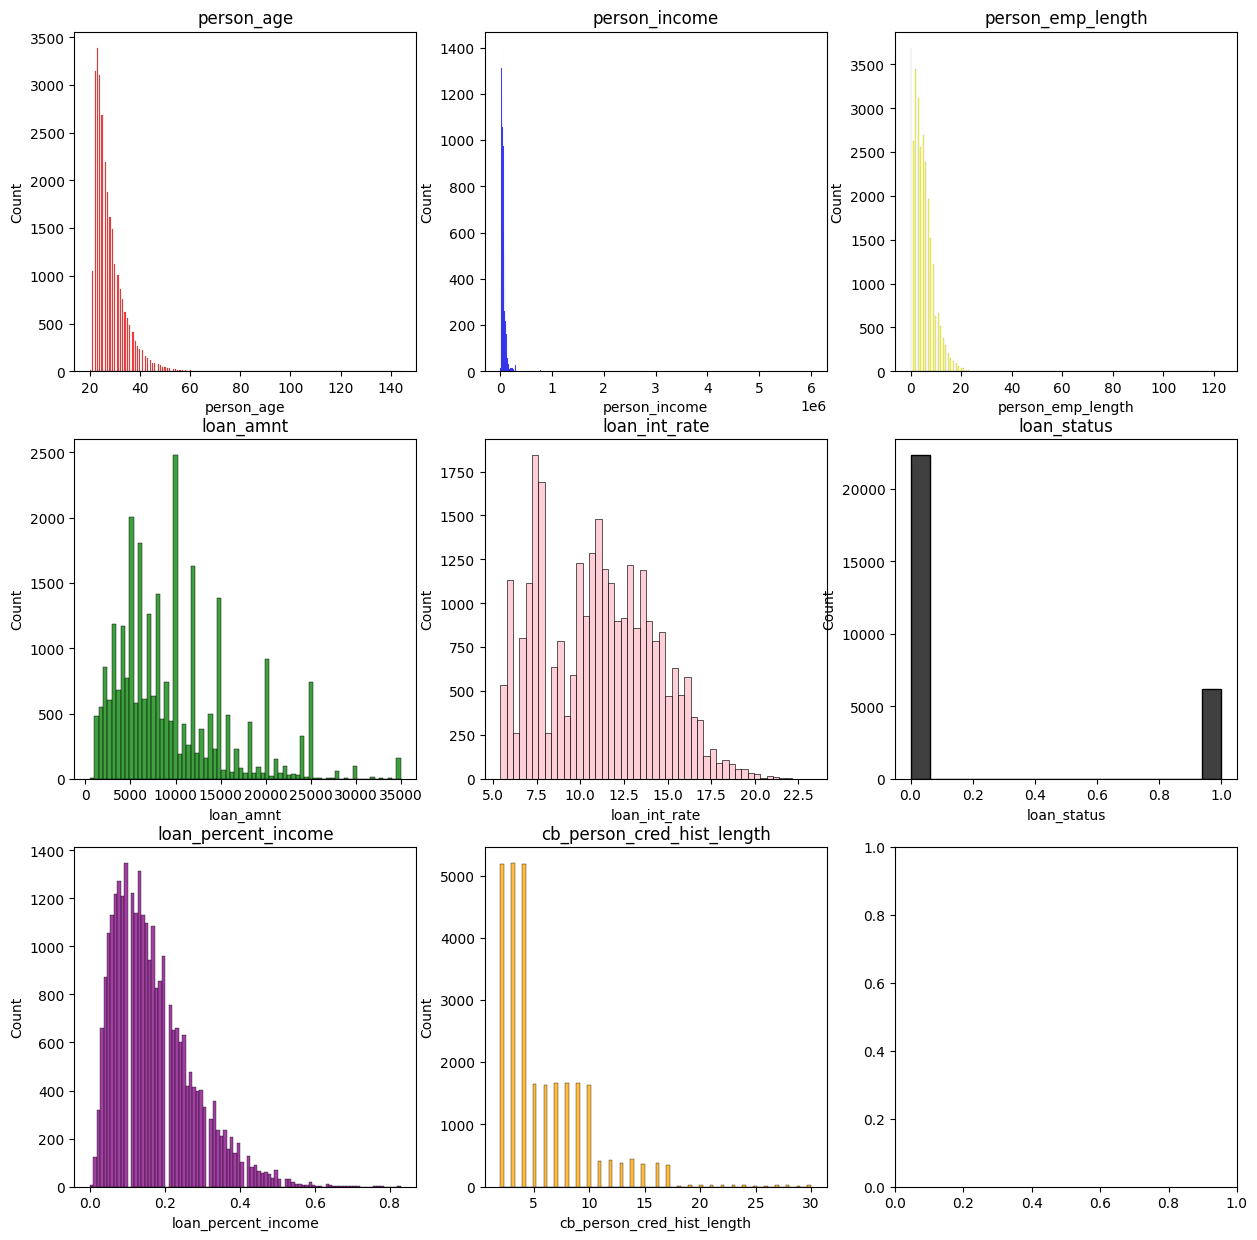

In [100]:
colors = ["red", "blue", "yellow", "green", "pink", "black", "purple", "orange"]
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i in range(len(df_num.columns)):
  sns.histplot(df_num[df_num.columns[i]], ax=ax[i//3, i%3], color=colors[i])
  ax[i//3, i%3].set_title(df_num.columns[i])

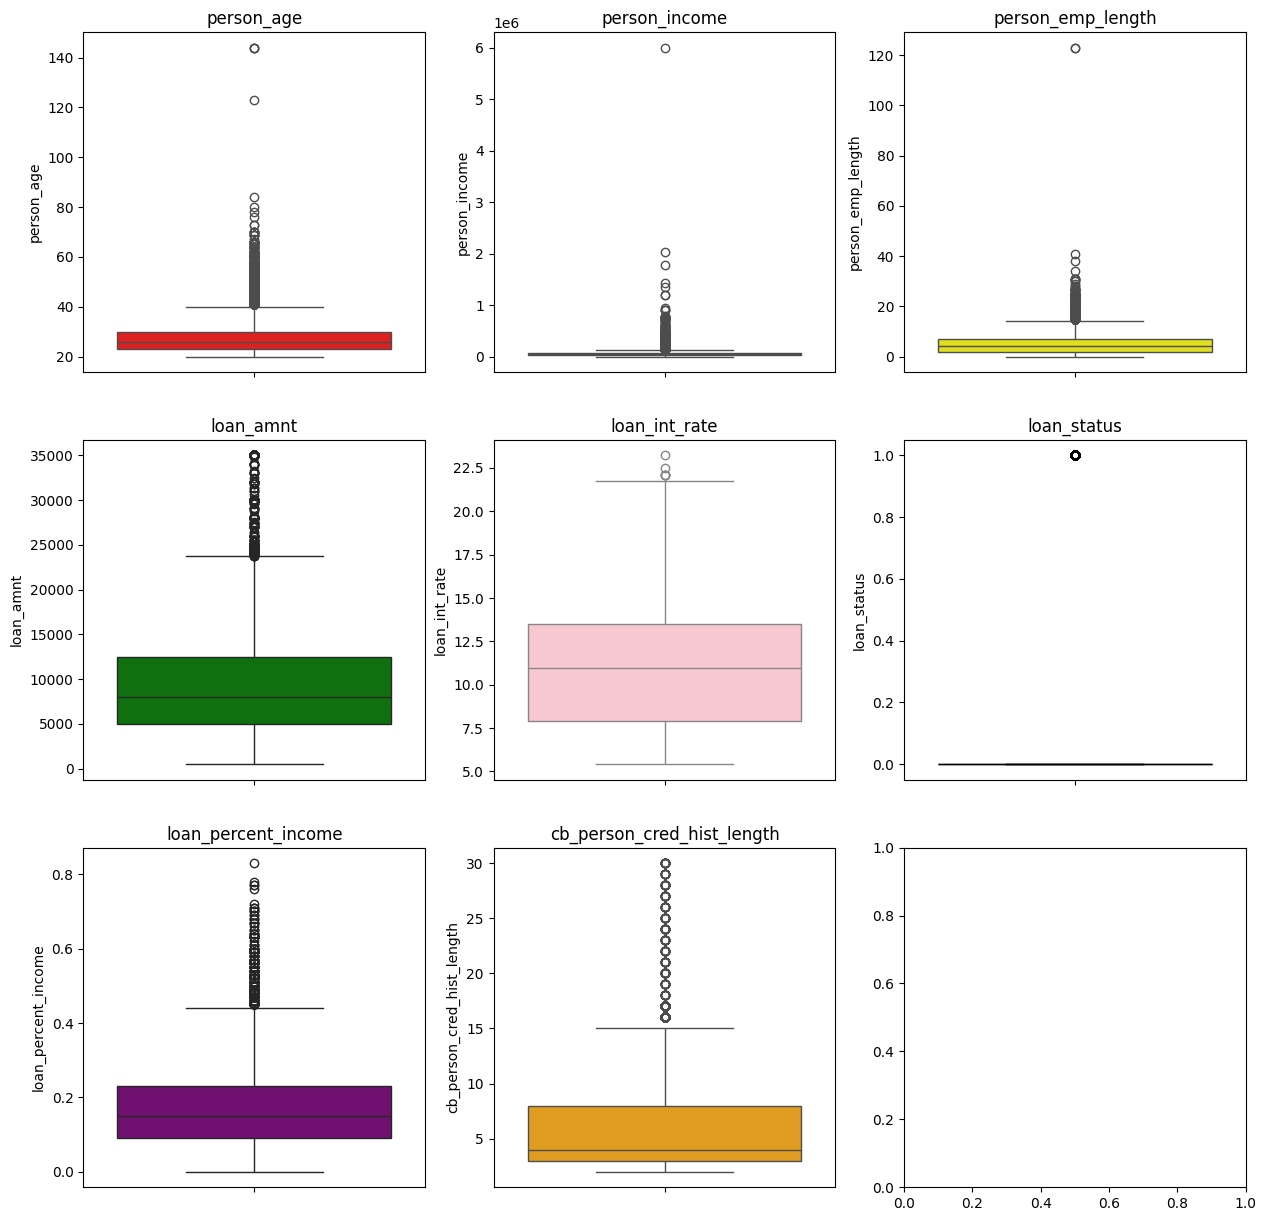

In [101]:
colors = ["red", "blue", "yellow", "green", "pink", "black", "purple", "orange"]
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i in range(len(df_num.columns)):
  sns.boxplot(df_num[df_num.columns[i]], ax=ax[i//3, i%3], color=colors[i])
  ax[i//3, i%3].set_title(df_num.columns[i])

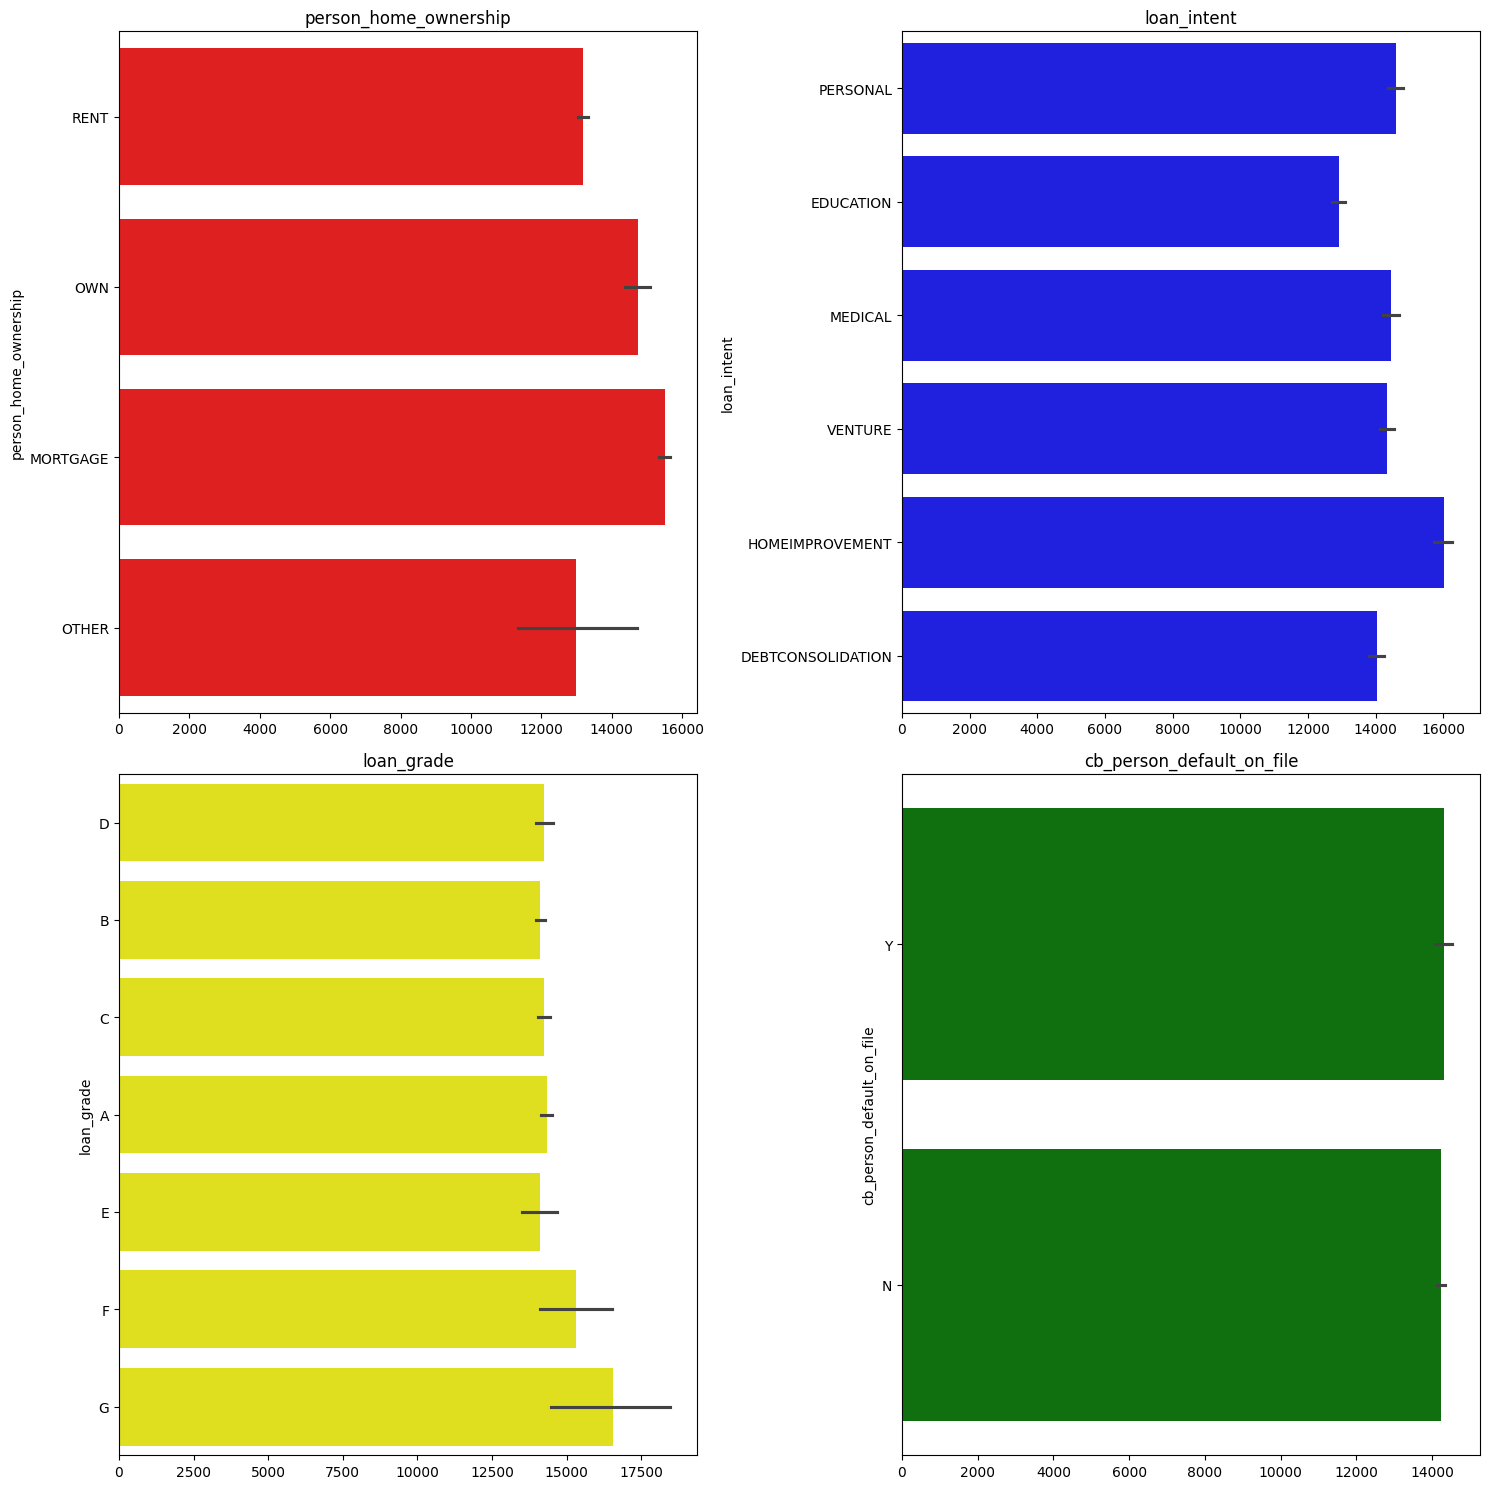

In [102]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
for i in range(len(df_cat.columns)):
  sns.barplot(df_cat[df_cat.columns[i]], ax=ax[i//2, i%2], color=colors[i])
  ax[i//2, i%2].set_title(df_cat.columns[i])
plt.tight_layout()

Encoding the categorical Data

In [103]:
df_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [104]:
encoder = OneHotEncoder()
df_cat_encoded = encoder.fit_transform(df_cat.drop("loan_grade", axis=1))
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=encoder.get_feature_names_out())

with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [105]:
encoder = LabelEncoder()
df_cat_encoded["loan_grade"] = encoder.fit_transform(df_cat["loan_grade"])

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

Splitting the dataset

In [106]:
X = pd.concat([df_num.drop("loan_status", axis = 1), df_cat_encoded], axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [110]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [112]:
y_pred = dtc.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred, target_names=['Denied', 'Approved']))

              precision    recall  f1-score   support

      Denied       0.93      0.93      0.93      4441
    Approved       0.75      0.76      0.76      1260

    accuracy                           0.89      5701
   macro avg       0.84      0.85      0.84      5701
weighted avg       0.89      0.89      0.89      5701



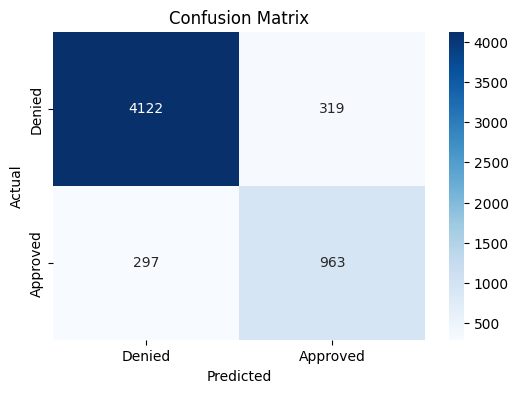

In [114]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Denied', 'Approved'],
    yticklabels=['Denied', 'Approved'],
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [116]:
# Predict probabilities for ROC curve
y_proba = dtc.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.85


In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

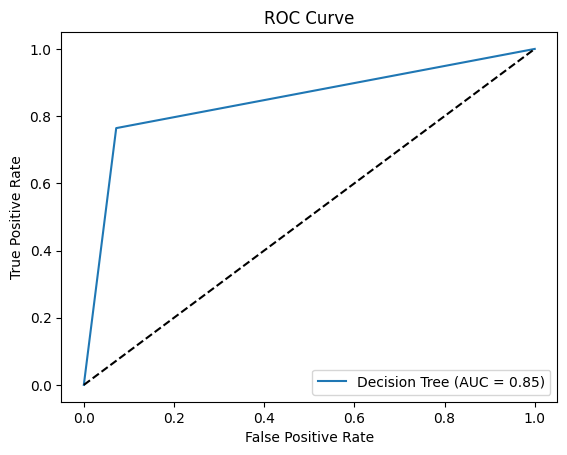

In [118]:
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [121]:
#Finding out feature importance

feature_importances = dtc.feature_importances_
feature_names = X_train.columns

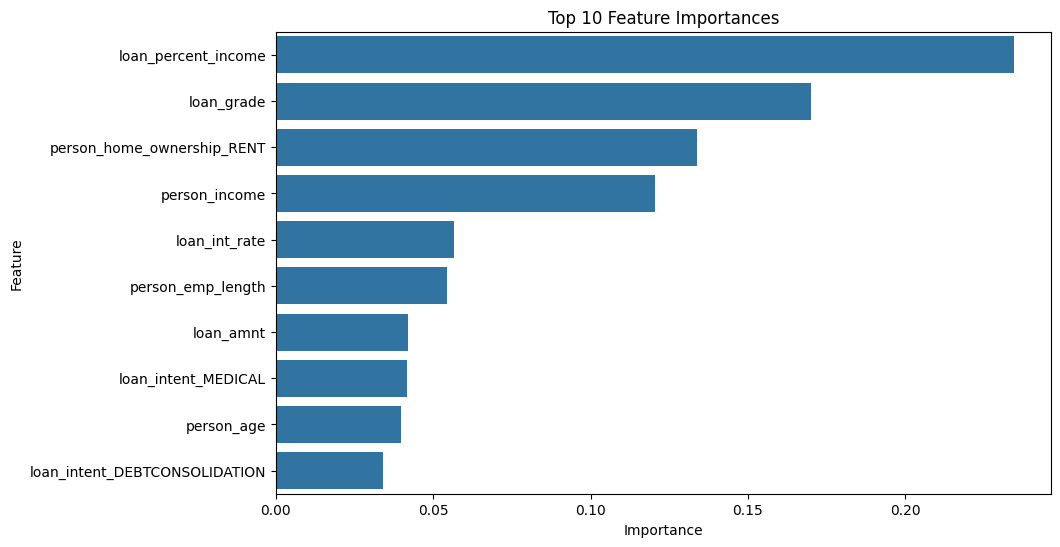

In [122]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [123]:
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)